In [1]:
import sklearn
from sklearn import *
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import tensorly as tl

Using numpy backend.


In [2]:
path = "./data_3_variables/"
n_person = 10
n_view = 9
n_illum = 6
x_size = 100
y_size = 100

images = np.empty((n_person, n_view, n_illum, x_size, y_size))
for im_name in os.listdir(path):
    parsed = im_name.split("_")
    person = int(parsed[0])
    view   = int(-int(parsed[1])/4)
    illum  = int(int(parsed[4])/15)-1
    images[person, view, illum] = cv2.resize(cv2.imread( path+im_name, 0), (100,100))

In [31]:
p1 = images[:,:,:,:,:].reshape(-1,100*100)

In [33]:
u,s,v = np.linalg.svd(p1)

In [39]:
v.shape

(10000, 10000)

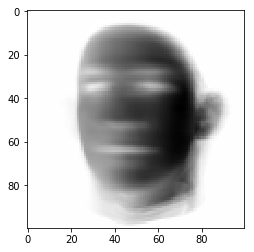

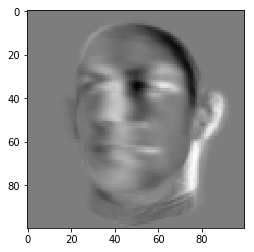

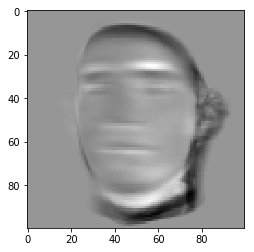

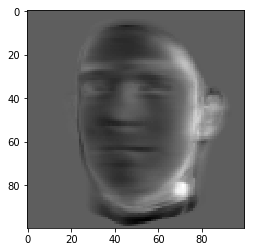

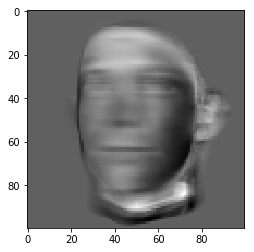

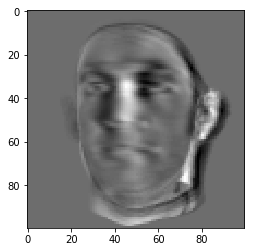

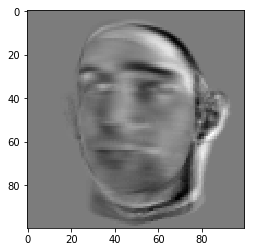

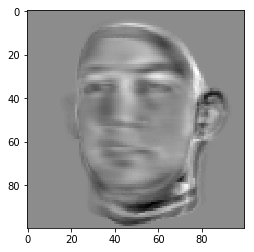

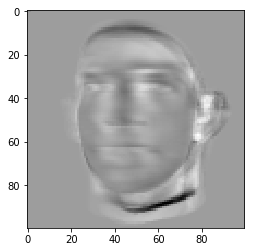

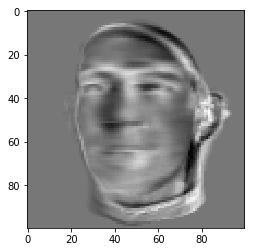

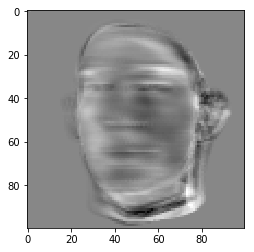

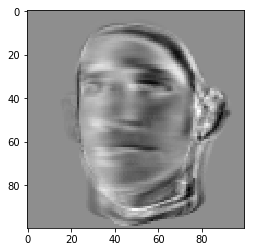

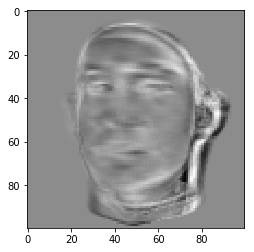

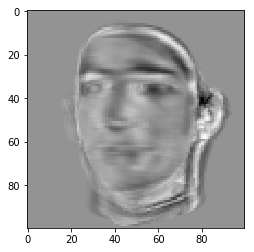

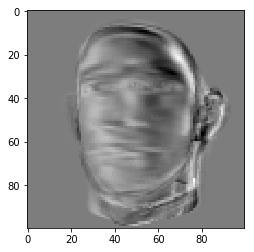

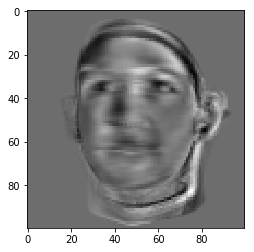

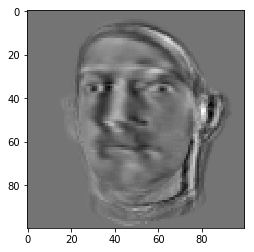

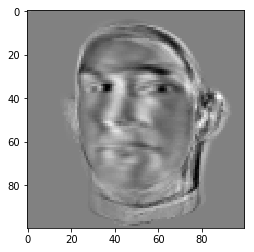

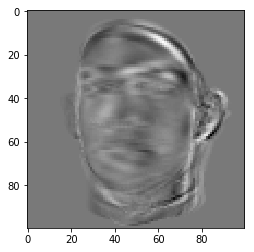

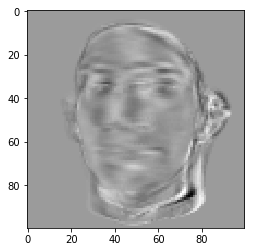

<Figure size 432x288 with 0 Axes>

In [59]:
for i in range(20):
    plt.imshow(v[i,:].reshape(100,100), cmap="gray")
    plt.figure()

In [56]:
n_components=20
ica = sklearn.decomposition.FastICA(n_components=n_components)

In [57]:
ica.fit(p1)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=20, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

/home/adrien/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


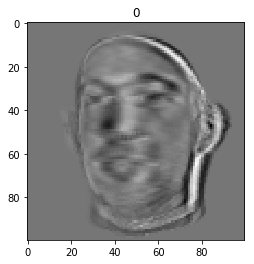

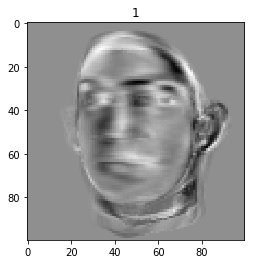

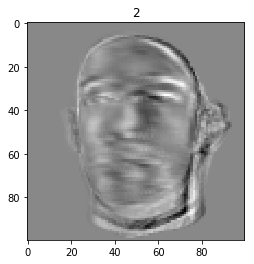

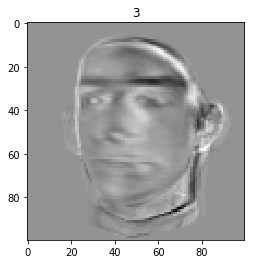

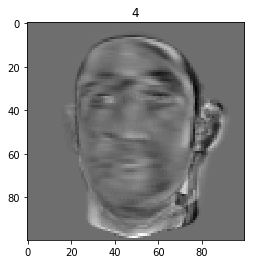

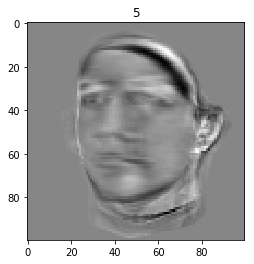

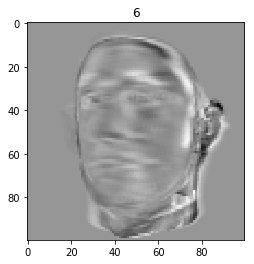

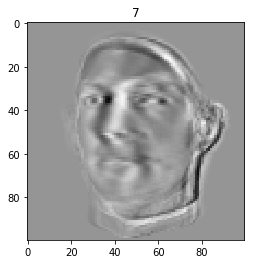

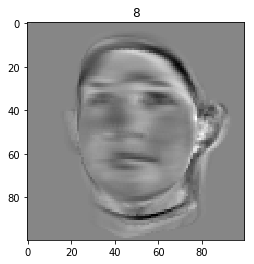

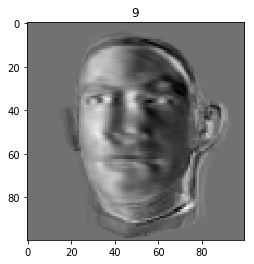

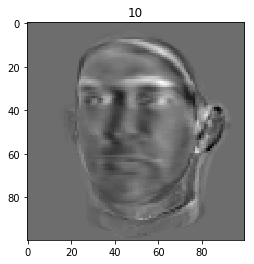

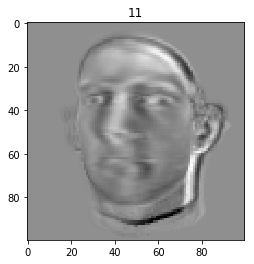

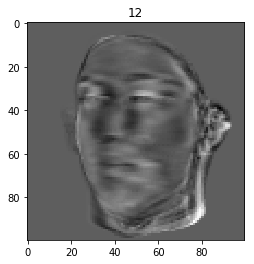

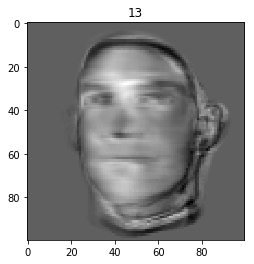

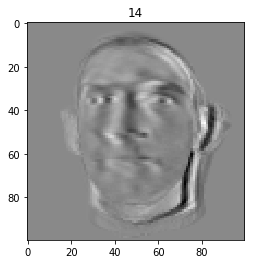

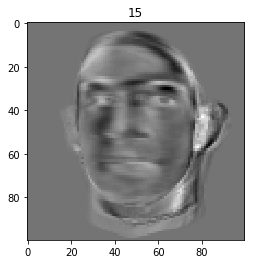

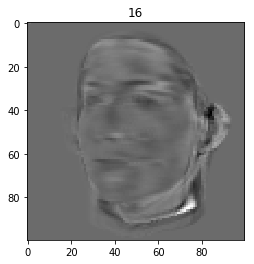

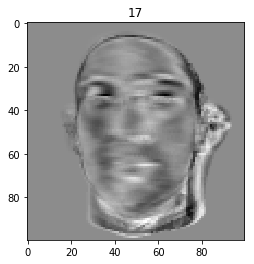

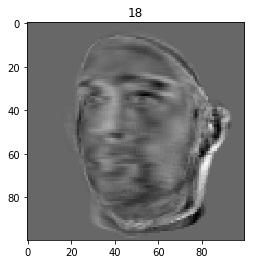

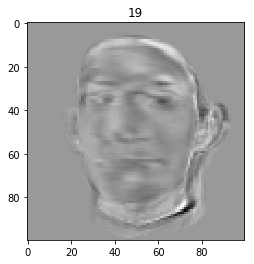

<Figure size 432x288 with 0 Axes>

In [58]:
for i in range(n_components):
    plt.imshow(ica.components_[i].reshape(100,100), cmap="gray")
    plt.title(str(i))
    plt.figure()

In [51]:
pca = sklearn.decomposition.PCA(n_components=n_components)

In [52]:
pca.fit(p1)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

/home/adrien/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


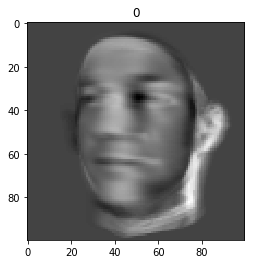

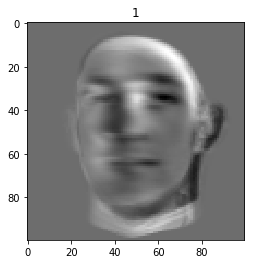

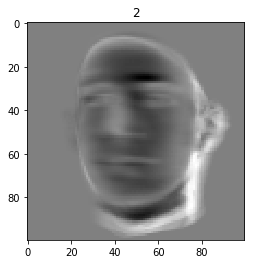

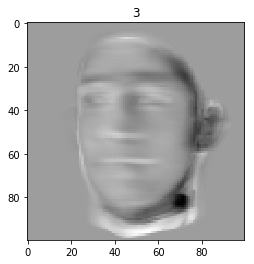

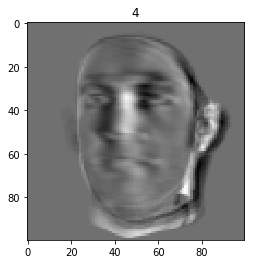

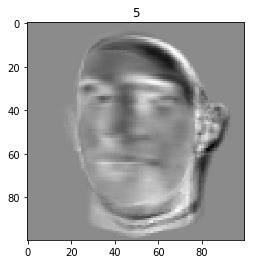

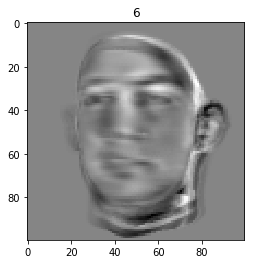

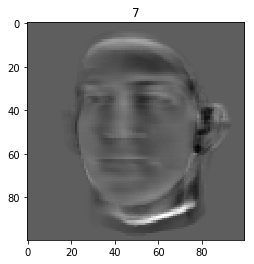

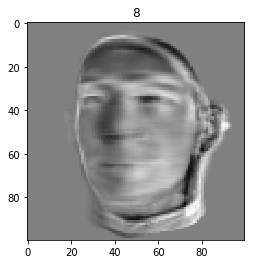

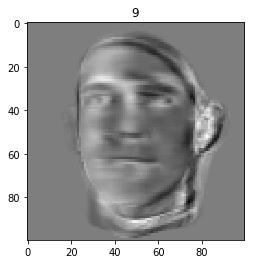

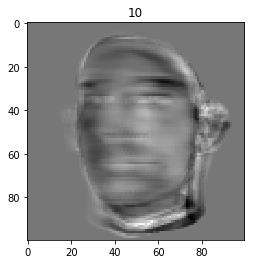

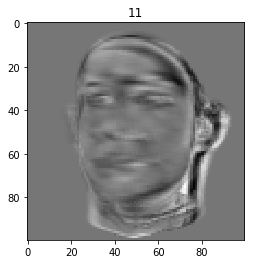

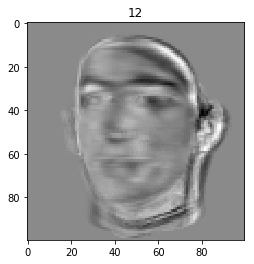

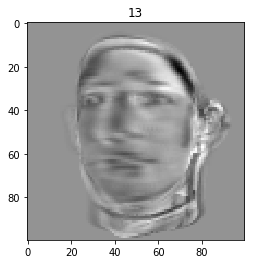

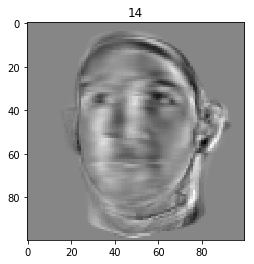

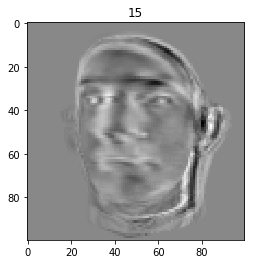

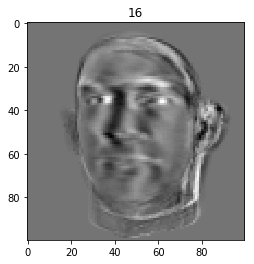

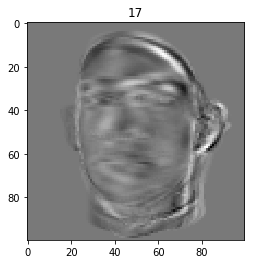

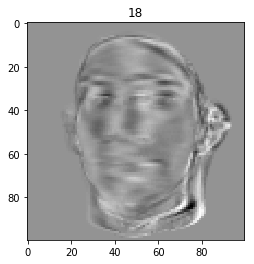

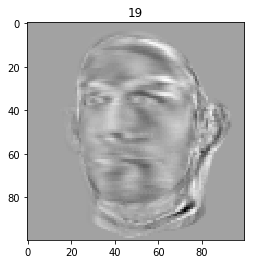

<Figure size 432x288 with 0 Axes>

In [54]:
for i in range(n_components):
    plt.imshow(pca.components_[i].reshape(100,100), cmap="gray")
    plt.title(str(i))
    plt.figure()
    

In [3]:
U = []
for i in range(3):
    u, s, v = np.linalg.svd(tl.base.unfold(images, i))
    U.append(u)

MemoryError: 

In [5]:
tl.base.unfold(images, i).shape

(10, 540000)

In [66]:
T = np.arange(27).reshape(3,3,3)
T

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [65]:
T.reshape(-1,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [68]:
T2 = torch.tensor(T)

In [75]:
T2.squeeze(dim=2)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [78]:
T3 = tl.tensor(T)

In [89]:
tl.base.unfold(T3, 0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [85]:
T3

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])